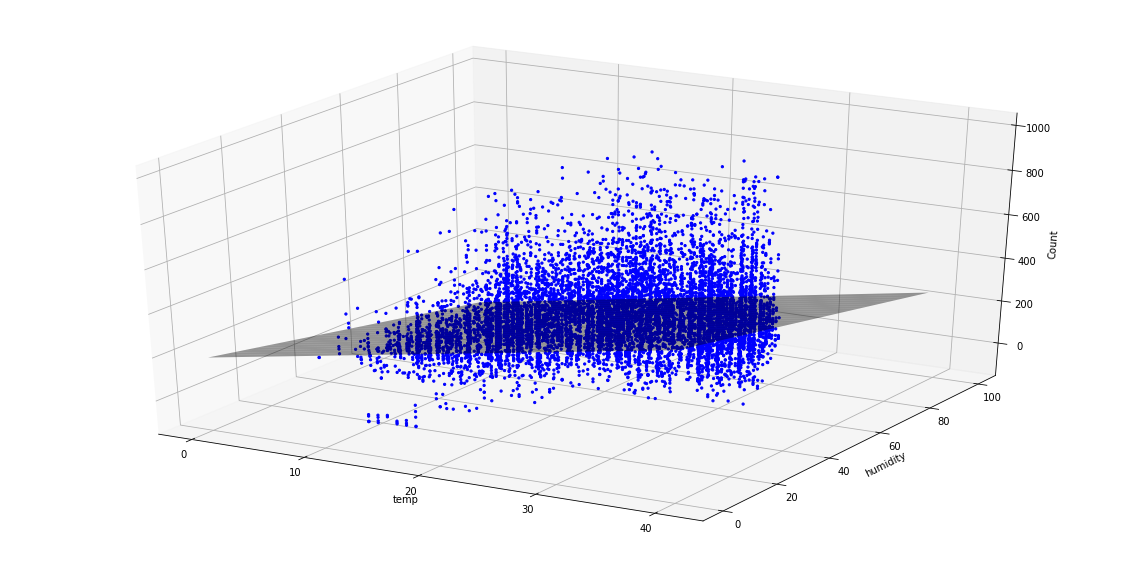

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('../bike-sharing-demand/train.csv')

features = ['temp', 'humidity'] #can only be 2!

m = LinearRegression()
m.fit(df[features], df['count'])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, df[features[0]].max(), 20)                # generate a mesh
y_surf = np.arange(0, df[features[1]].max(), 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.DataFrame({features[0]: x_surf.ravel(), features[1]: y_surf.ravel()})
out = m.predict(exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(df[features[0]], df[features[1]], df['count'],
           c='blue',
           marker='o',
           s=5.0,
           alpha=1)

ax.set_xlabel(f'{features[0]}')
ax.set_ylabel(f'{features[1]}')
ax.set_zlabel('Count')

plt.show()